In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df_parts = pd.read_csv('./car parts 50/car parts.csv')
df_parts.head()

,class index,filepaths,labels,data set
0,0,train/AIR COMPRESSOR/001.jpg,AIR COMPRESSOR,train
1,0,train/AIR COMPRESSOR/002.jpg,AIR COMPRESSOR,train
2,0,train/AIR COMPRESSOR/003.jpg,AIR COMPRESSOR,train
3,0,train/AIR COMPRESSOR/004.jpg,AIR COMPRESSOR,train
4,0,train/AIR COMPRESSOR/005.jpg,AIR COMPRESSOR,train


In [3]:
class_counts = df_parts['labels'].value_counts()
print(class_counts)

labels
IGNITION COIL           210
IDLER ARM               208
STARTER                 205
CARBERATOR              202
ALTERNATOR              200
SHIFT KNOB              199
OVERFLOW TANK           199
RADIO                   199
FUEL INJECTOR           198
ENGINE BLOCK            198
BRAKE PAD               198
OIL PAN                 197
TORQUE CONVERTER        197
OIL PRESSURE SENSOR     197
SIDE MIRROR             196
GAS CAP                 196
SPOILER                 195
AIR COMPRESSOR          195
CYLINDER HEAD           194
PRESSURE PLATE          192
THERMOSTAT              192
OXYGEN SENSOR           192
CLUTCH PLATE            191
CRANKSHAFT              190
INSTRUMENT CLUSTER      190
RIM                     189
WINDOW REGULATOR        189
VACUUM BRAKE BOOSTER    188
BATTERY                 187
WATER PUMP              186
BRAKE ROTOR             186
VALVE LIFTER            185
RADIATOR HOSE           185
BRAKE CALIPER           184
LOWER CONTROL ARM       179
OIL FILTER   

In [4]:
import os
import shutil
import numpy as np
import pandas as pd
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img

label_to_index = {label: idx for idx, label in enumerate(df_parts['labels'].unique())}

base_dir = './car parts 50'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')
augmented_dir = './car_parts_balanced'

for dataset in ['train', 'valid', 'test']:
    os.makedirs(os.path.join(augmented_dir, dataset), exist_ok=True)

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

def augment_and_save_image(img_path, save_dir, num_augmented, label, csv_list, split_name):
    img = load_img(img_path)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    gen = datagen.flow(x, batch_size=1)
    for i in range(num_augmented):
        aug_img = next(gen)[0]
        aug_img_path = os.path.join(save_dir, f"{os.path.splitext(os.path.basename(img_path))[0]}_aug_{i}.png")
        save_img(aug_img_path, aug_img)
        class_index = label_to_index[label]
        csv_list.append([class_index, f'{split_name}/{label}/{os.path.basename(aug_img_path)}', label, split_name])

def balance_dataset(base_dir, augmented_dir, split_name, target_counts, csv_list):
    for label in os.listdir(base_dir):
        original_class_dir = os.path.join(base_dir, label)
        augmented_class_dir = os.path.join(augmented_dir, split_name, label)
        
        if not os.path.exists(augmented_class_dir):
            os.makedirs(augmented_class_dir)
        
        image_list = os.listdir(original_class_dir)
        image_count = len(image_list)
        
        for img_name in image_list:
            img_path = os.path.join(original_class_dir, img_name)
            shutil.copy(img_path, augmented_class_dir)
            class_index = label_to_index[label]
            csv_list.append([class_index, f'{split_name}/{label}/{img_name}', label, split_name])
        
        if image_count < target_counts:
            num_additional_images = target_counts - image_count
            for img_name in image_list:
                img_path = os.path.join(original_class_dir, img_name)
                augment_and_save_image(img_path, augmented_class_dir, num_additional_images // image_count + 1, label, csv_list, split_name)
                num_additional_images -= num_additional_images // image_count + 1
                if num_additional_images <= 0:
                    break
        elif image_count > target_counts:
            excess_images = np.random.choice(image_list, size=image_count - target_counts, replace=False)
            for img_name in excess_images:
                img_path = os.path.join(augmented_class_dir, img_name)
                os.remove(img_path)
                csv_list.remove([label_to_index[label], f'{split_name}/{label}/{img_name}', label, split_name])

csv_list = []


balance_dataset(train_dir, augmented_dir, 'train', target_counts=190, csv_list=csv_list)
balance_dataset(valid_dir, augmented_dir, 'valid', target_counts=5, csv_list=csv_list)
balance_dataset(test_dir, augmented_dir, 'test', target_counts=5, csv_list=csv_list)

df_augmented = pd.DataFrame(csv_list, columns=['class index', 'filepaths', 'labels', 'data set'])
df_augmented.to_csv(os.path.join(augmented_dir, 'balanced_car_parts.csv'), index=False)

print("Data augmentation completed.")


Data augmentation completed.


In [5]:
df_balanced_parts = pd.read_csv('./car_parts_balanced/balanced_car_parts.csv')
df_balanced_parts.head()

,class index,filepaths,labels,data set
0,0,train/AIR COMPRESSOR/001.jpg,AIR COMPRESSOR,train
1,0,train/AIR COMPRESSOR/002.jpg,AIR COMPRESSOR,train
2,0,train/AIR COMPRESSOR/003.jpg,AIR COMPRESSOR,train
3,0,train/AIR COMPRESSOR/004.jpg,AIR COMPRESSOR,train
4,0,train/AIR COMPRESSOR/005.jpg,AIR COMPRESSOR,train


In [6]:
class_counts = df_balanced_parts['labels'].value_counts()
print(class_counts)

labels
AIR COMPRESSOR          200
SHIFT KNOB              200
OIL PRESSURE SENSOR     200
OVERFLOW TANK           200
OXYGEN SENSOR           200
PISTON                  200
PRESSURE PLATE          200
RADIATOR                200
RADIATOR FAN            200
RADIATOR HOSE           200
RADIO                   200
RIM                     200
SIDE MIRROR             200
ALTERNATOR              200
SPARK PLUG              200
SPOILER                 200
STARTER                 200
TAILLIGHTS              200
THERMOSTAT              200
TORQUE CONVERTER        200
TRANSMISSION            200
VACUUM BRAKE BOOSTER    200
VALVE LIFTER            200
WATER PUMP              200
OIL PAN                 200
OIL FILTER              200
MUFFLER                 200
LOWER CONTROL ARM       200
BATTERY                 200
BRAKE CALIPER           200
BRAKE PAD               200
BRAKE ROTOR             200
CAMSHAFT                200
CARBERATOR              200
CLUTCH PLATE            200
COIL SPRING  

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [8]:
base_model = MobileNetV2(weights='imagenet', include_top=False)

for layer in base_model.layers:
    layer.trainable = False

num_classes = 50
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

C:\Users\Raghurama Reddy\AppData\Local\Temp\ipykernel_15880\568913877.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False)


In [9]:
def F1_metric(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())

    f1 = 2 * precision * recall / (precision + recall + K.epsilon())
    weighted_f1 = K.sum(f1 * K.sum(y_true, axis=0)) / K.sum(y_true)

    return weighted_f1

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=['accuracy', F1_metric])

In [11]:
train_dir = "./car_parts_balanced/train"
valid_dir = "./car_parts_balanced/valid"
test_dir = "./car_parts_balanced/test"

In [12]:
target_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=target_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=False)

Found 9500 images belonging to 50 classes.
Found 250 images belonging to 50 classes.
Found 250 images belonging to 50 classes.


In [14]:
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

history = model.fit(
    train_generator,
    epochs=25,
    validation_data=valid_generator,
    callbacks=[checkpoint, early_stopping, lr_scheduler]
)

Epoch 1/25


c:\Users\Raghurama Reddy\Desktop\summer24\Bristlecone-car\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


297/297 ━━━━━━━━━━━━━━━━━━━━ 416s 1s/step - accuracy: 0.4980 - f1_metric: 0.3637 - loss: 3.0425 - val_accuracy: 0.8400 - val_f1_metric: 0.7930 - val_loss: 1.3687 - learning_rate: 0.0010
Epoch 2/25
297/297 ━━━━━━━━━━━━━━━━━━━━ 294s 972ms/step - accuracy: 0.7616 - f1_metric: 0.7074 - loss: 1.5483 - val_accuracy: 0.8720 - val_f1_metric: 0.8264 - val_loss: 1.1322 - learning_rate: 0.0010
Epoch 3/25
297/297 ━━━━━━━━━━━━━━━━━━━━ 303s 1s/step - accuracy: 0.8008 - f1_metric: 0.7535 - loss: 1.2981 - val_accuracy: 0.8480 - val_f1_metric: 0.8283 - val_loss: 1.0648 - learning_rate: 0.0010
Epoch 4/25
297/297 ━━━━━━━━━━━━━━━━━━━━ 295s 978ms/step - accuracy: 0.8105 - f1_metric: 0.7673 - loss: 1.2019 - val_accuracy: 0.8760 - val_f1_metric: 0.8508 - val_loss: 0.9734 - learning_rate: 0.0010
Epoch 5/25
297/297 ━━━━━━━━━━━━━━━━━━━━ 311s 1s/step - accuracy: 0.8154 - f1_metric: 0.7788 - loss: 1.1400 - val_accuracy: 0.8720 - val_f1_metric: 0.8395 - val_loss: 0.9255 - learning_rate: 0.0010
Epoch 6/25
297/297 ━

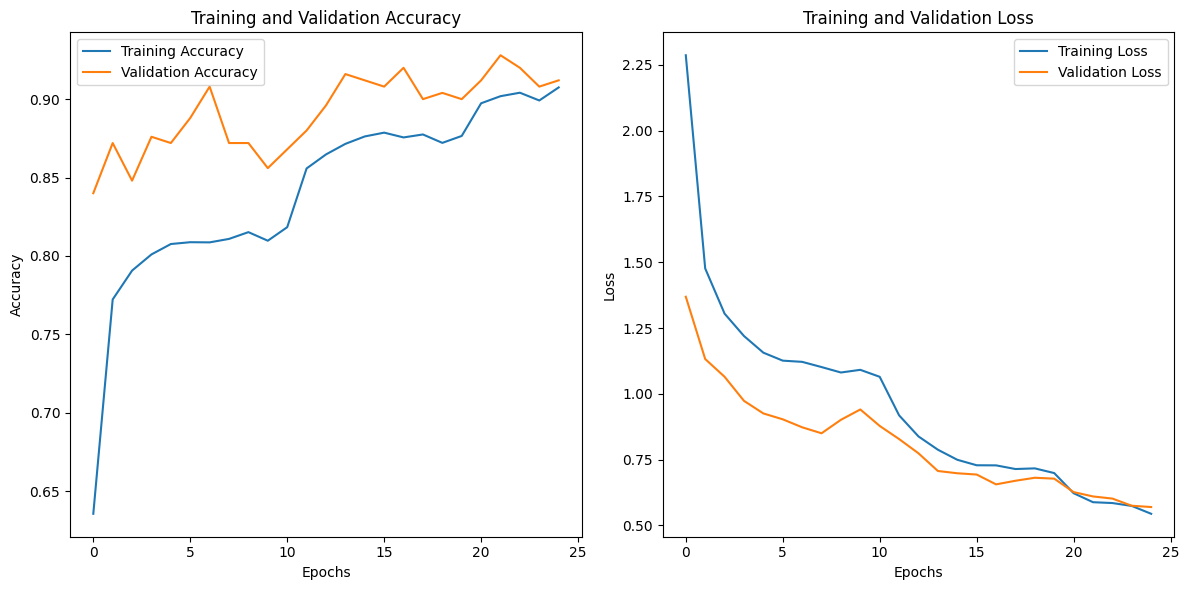

In [15]:
def plot_learning_curves(history):
    epochs = range(len(history.history['loss']))

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_learning_curves(history)

In [16]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)
test_results = model.evaluate(test_generator)

Found 250 images belonging to 50 classes.
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 771ms/step - accuracy: 0.9591 - f1_metric: 0.9563 - loss: 0.4181


In [17]:
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])
print("Test F1 Score:", test_results[2])

Test Loss: 0.4265041649341583
Test Accuracy: 0.9559999704360962
Test F1 Score: 0.9588090777397156


Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


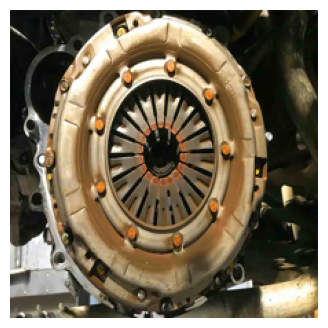

Top Predictions for ./live_images\clutch-plate.jpg:
PRESSURE PLATE: 1.00
TRANSMISSION: 0.00
RADIATOR FAN: 0.00

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


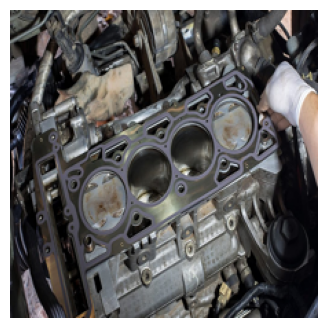

Top Predictions for ./live_images\engine-block.jpg:
ENGINE BLOCK: 0.98
CYLINDER HEAD: 0.02
CARBERATOR: 0.00

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


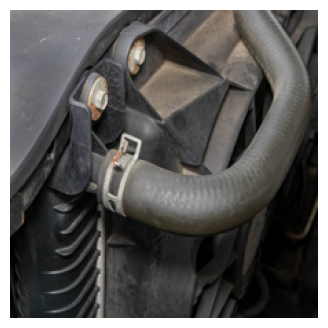

Top Predictions for ./live_images\radiator-hose.jpg:
RADIATOR HOSE: 0.46
LOWER CONTROL ARM: 0.42
IDLER ARM: 0.03

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


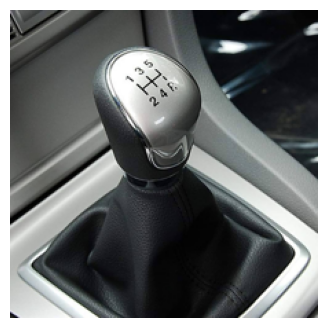

Top Predictions for ./live_images\shift-knob.jpg:
SHIFT KNOB: 0.99
SIDE MIRROR: 0.00
MUFFLER: 0.00

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


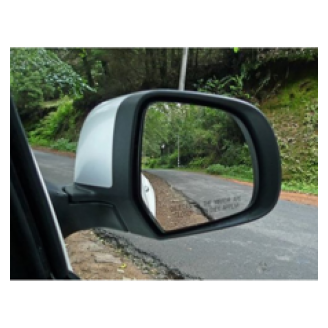

Top Predictions for ./live_images\side-mirror.jpg:
SIDE MIRROR: 0.98
MUFFLER: 0.01
SPOILER: 0.00

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


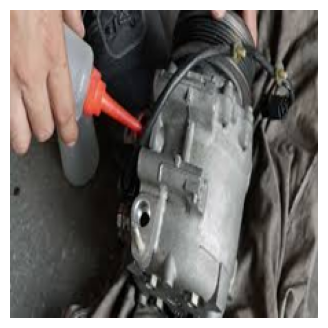

Top Predictions for ./live_images\air-compressor.jpeg:
DISTRIBUTOR: 0.50
AIR COMPRESSOR: 0.20
TRANSMISSION: 0.08

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


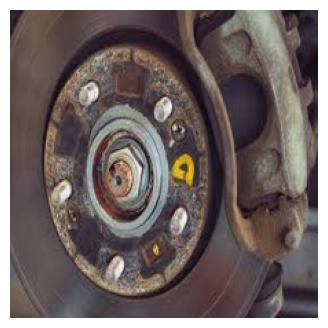

Top Predictions for ./live_images\brake-rotor.jpeg:
BRAKE ROTOR: 0.99
CLUTCH PLATE: 0.00
TORQUE CONVERTER: 0.00

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


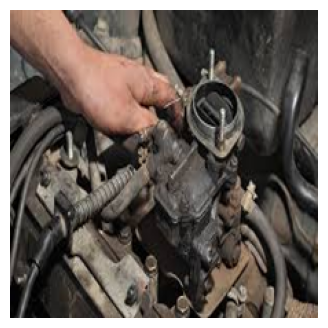

Top Predictions for ./live_images\carburetor.jpeg:
DISTRIBUTOR: 0.37
CARBERATOR: 0.34
WATER PUMP: 0.11

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


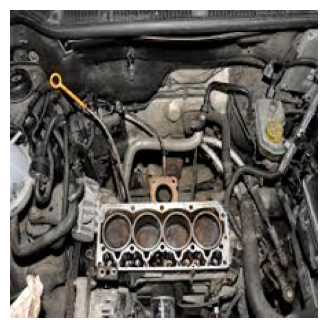

Top Predictions for ./live_images\cylinder-head.jpeg:
ENGINE BLOCK: 0.98
CYLINDER HEAD: 0.01
TRANSMISSION: 0.01

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


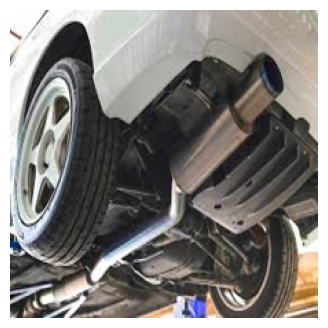

Top Predictions for ./live_images\muffler.jpeg:
ALTERNATOR: 0.58
WATER PUMP: 0.14
DISTRIBUTOR: 0.06

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


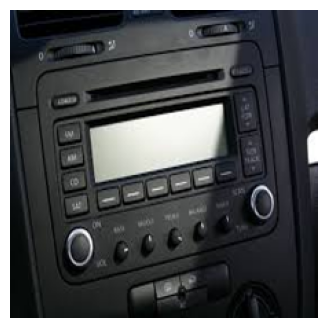

Top Predictions for ./live_images\radio.jpeg:
RADIO: 1.00
SHIFT KNOB: 0.00
TAILLIGHTS: 0.00

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


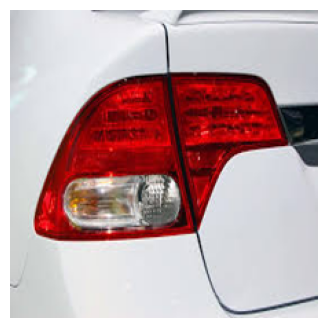

Top Predictions for ./live_images\taillights.jpeg:
TAILLIGHTS: 0.93
HEADLIGHTS: 0.07
SIDE MIRROR: 0.00

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


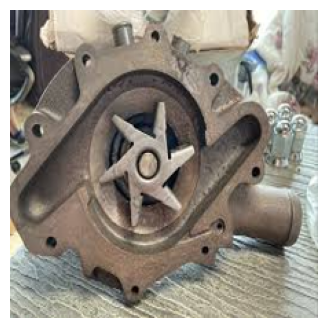

Top Predictions for ./live_images\water-pump.jpeg:
WATER PUMP: 1.00
CARBERATOR: 0.00
PRESSURE PLATE: 0.00

Processing complete.


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import glob
import tensorflow as tf
from tensorflow.keras.models import load_model

balanced_df = pd.read_csv('car_parts_balanced/balanced_car_parts.csv')
class_names = balanced_df['labels'].unique().tolist()

def load_and_preprocess_image(img_path, target_size=(224, 224)):
    try:
        img = Image.open(img_path)
        img = img.resize(target_size)
        img_array = np.expand_dims(np.array(img), axis=0) / 255.0  
        return img_array, img
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")
        return None, None

def predict_top_classes(model, img_array, class_names):
    try:
        predictions = model.predict(img_array)
        top_classes = predictions.argsort()[0][-3:][::-1]  
        top_probs = predictions[0][top_classes] 
        top_labels = [class_names[class_idx] for class_idx in top_classes]  
        
        return top_labels, top_probs
    except Exception as e:
        print(f"Error predicting classes: {e}")
        return [], []

def display_image_with_predictions(img, top_labels, top_probs):
    plt.figure(figsize=(6, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

live_images_dir = './live_images/'
live_image_files_jpg = glob.glob(live_images_dir + '*.jpg')
live_image_files_jpeg = glob.glob(live_images_dir + '*.jpeg')
live_image_files = live_image_files_jpg + live_image_files_jpeg

try:
    model = load_model('best_model.keras', custom_objects={'F1_metric': F1_metric})
    print("Model loaded successfully.")

    predictions_list = []

    for img_path in live_image_files:
        img_array, img = load_and_preprocess_image(img_path)
        if img_array is None:
            continue
        
        top_labels, top_probs = predict_top_classes(model, img_array, class_names)
        if not top_labels:
            print(f"No predictions for {img_path}")
            continue
        
        predictions_list.append({
            'Image_Path': img_path,
            'Prediction_1': f'{top_labels[0]} ({top_probs[0]:.2f})',
            'Prediction_2': f'{top_labels[1]} ({top_probs[1]:.2f})',
            'Prediction_3': f'{top_labels[2]} ({top_probs[2]:.2f})'
        })

        display_image_with_predictions(img, top_labels, top_probs)
        print(f"Top Predictions for {img_path}:")
        for label, prob in zip(top_labels, top_probs):
            print(f"{label}: {prob:.2f}")
        print()

    predictions_df = pd.DataFrame(predictions_list)
  
except Exception as e:
    print(f"Error: {e}")

print("Processing complete.")

In [40]:
predictions_df

,Image_Path,Prediction_1,Prediction_2,Prediction_3
0,./live_images\alternator.jpg,RADIATOR HOSE (0.45),DISTRIBUTOR (0.12),VACUUM BRAKE BOOSTER (0.09)
1,./live_images\engine-block.jpg,ENGINE BLOCK (0.98),CYLINDER HEAD (0.02),CARBERATOR (0.00)
2,./live_images\idler-arm.jpg,CARBERATOR (0.63),WATER PUMP (0.20),IDLER ARM (0.06)
3,./live_images\ignition-coil.jpg,ENGINE BLOCK (0.69),LOWER CONTROL ARM (0.05),ALTERNATOR (0.05)
4,./live_images\shift-knob.jpg,SHIFT KNOB (0.99),SIDE MIRROR (0.00),MUFFLER (0.00)
5,./live_images\side-mirror.jpg,SIDE MIRROR (0.98),MUFFLER (0.01),SPOILER (0.00)
6,./live_images\starter.jpg,CARBERATOR (0.55),TRANSMISSION (0.16),ENGINE BLOCK (0.13)
7,./live_images\air-compressor.jpeg,BRAKE CALIPER (0.34),LOWER CONTROL ARM (0.18),ALTERNATOR (0.15)
8,./live_images\brake-pad.jpeg,BRAKE ROTOR (0.31),WATER PUMP (0.27),ALTERNATOR (0.13)
9,./live_images\carburetor.jpeg,DISTRIBUTOR (0.37),CARBERATOR (0.34),WATER PUMP (0.11)
